# Data Exploration
Home Assignment – Applied Machine Learning

M.Sc. Business Administration and Information Systems

***

**Input**:
* csv data file produced by the script co2_dataPreperation.ibynb

**Output**:
* trends and relationship insights gained during data exploration

In [ ]:
# import all needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# align the units of features for machine learning tasks
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

In [ ]:
# load the cleaned dataset
data = pd.read_csv(r'data_cleaned2.csv')

In [ ]:
# Overview of the first rows of the dataset
data.head()

Overview of the first 5 rows:


country  year  clean_fuel_access_perc  elec_access_perc  nat_res_depl_perc  \
0  Albania  2000                    38.7         99.430855           0.467306   
1  Albania  2001                    41.0         99.421989           0.286160   
2  Albania  2002                    43.8         99.404579           0.296077   
3  Albania  2003                    46.5         99.385628           0.312900   
4  Albania  2004                    49.2         99.372139           0.365360   

   forest_depl_perc  agri_land_perc  agri_forest_fish_val_perc  \
0          0.122940       41.751825                  24.515412   
1          0.060695       41.569343                  22.716164   
2          0.064922       41.605839                  22.025114   
3          0.061352       40.912409                  21.978257   
4          0.052754       40.948905                  20.537486   

   co2_emissions_per_capita  cooling_degree_days  ...  mortality_rate_under_5  \
0                  1.031568               710.17  ...                    27.2   
1                  1.056868               686.38  ...                    25.8   
2                  1.233002               566.02  ...                    24.4   
3                  1.361159               931.89  ...                    22.9   
4                  1.427944               554.96  ...                    21.5   

   net_migration  nitrous_oxide_emissions_per_capita  \
0       -63610.0                            0.384636   
1       -62059.0                            0.375930   
2       -59876.0                            0.425487   
3       -57308.0                            0.431772   
4       -54383.0                            0.420342   

   population_65_above_perc  population_density  \
0                  7.821964          112.738212   
1                  8.145374          111.685146   
2                  8.508105          111.350730   
3                  8.899816          110.934890   
4                  9.308444          110.472226   

   female_to_male_labor_force_ratio  renewable_energy_consumption_perc  \
0                         69.454576                              41.36   
1                         69.303040                              39.04   
2                         69.232075                              35.82   
3                         69.876243                              33.67   
4                         70.592238                              35.84   

   scientific_journal_articles  precipitation_evapotranspiration  \
0                        22.34                         -2.147378   
1                        18.38                         -1.776391   
2                        24.53                          0.058111   
3                        22.82                         -0.869403   
4                        17.91                         -0.052818   

   unemployment_total_perc  
0                   19.028  
1                   18.575  
2                   17.895  
3                   16.989  
4                   16.310  

[5 rows x 32 columns]

In [ ]:
# Shape of the dataset (rows, columns)
data.shape

Shape of the dataset:


(3360, 32)

In [ ]:
# available columns and their data types in the dataset
data.dtypes

available columns and their data types:


country                                object
year                                    int64
clean_fuel_access_perc                float64
elec_access_perc                      float64
nat_res_depl_perc                     float64
forest_depl_perc                      float64
agri_land_perc                        float64
agri_forest_fish_val_perc             float64
co2_emissions_per_capita              float64
cooling_degree_days                   float64
energy_intensity_primary_energy       float64
fertility_rate                        float64
food_prod_index                       float64
forest_area_perc                      float64
gdp_growth_perc                       float64
heat_index_35                         float64
heating_degree_days                   float64
internet_usage_perc                   float64
labor_force_participation_perc        float64
land_surface_temp                     float64
life_expectancy                       float64
methane_emissions_per_capita      

In [ ]:
# Descriptive statistics of the dataset
data.describe()

Descriptive statistics:


year  clean_fuel_access_perc  elec_access_perc  \
count  3360.000000             3360.000000       3360.000000   
mean   2010.000000               65.904747         79.387188   
std       6.056202               37.922080         30.151959   
min    2000.000000                0.100000          1.279584   
25%    2005.000000               31.200000         62.076360   
50%    2010.000000               84.500000         98.402355   
75%    2015.000000              100.000000        100.000000   
max    2020.000000              100.000000        100.000000   

       nat_res_depl_perc  forest_depl_perc  agri_land_perc  \
count        3360.000000       3360.000000     3360.000000   
mean            4.579793          1.346549       40.068974   
std             7.041690          3.596695       21.178159   
min             0.000000          0.000000        0.448718   
25%             0.180715          0.000000       23.312208   
50%             1.345861          0.001137       41.149693   
75%             6.212115          0.463560       55.815763   
max            65.208096         41.351443       85.487373   

       agri_forest_fish_val_perc  co2_emissions_per_capita  \
count                3360.000000               3360.000000   
mean                   11.333501                  4.620633   
std                    10.806367                  5.714601   
min                     0.030137                  0.021790   
25%                     2.924509                  0.743443   
50%                     7.826341                  2.674141   
75%                    17.007513                  6.578129   
max                    60.609881                 47.656962   

       cooling_degree_days  energy_intensity_primary_energy  ...  \
count          3360.000000                      3360.000000  ...   
mean           2938.234277                         5.517463  ...   
std            2188.221113                         3.503599  ...   
min               0.000000                         1.220000  ...   
25%             688.862500                         3.380000  ...   
50%            3001.620000                         4.480000  ...   
75%            4829.487500                         6.300000  ...   
max            7541.700000                        32.570000  ...   

       mortality_rate_under_5  net_migration  \
count             3360.000000   3.360000e+03   
mean                37.855119   4.221348e+02   
std                 41.355269   1.981143e+05   
min                  2.100000  -2.290411e+06   
25%                  7.700000  -2.737000e+04   
50%                 20.200000  -2.537000e+03   
75%                 55.925000   1.550525e+04   
max                228.500000   1.479676e+06   

       nitrous_oxide_emissions_per_capita  population_65_above_perc  \
count                         3360.000000               3360.000000   
mean                             0.571053                  8.058524   
std                              0.664798                  5.774605   
min                              0.052821                  0.171770   
25%                              0.243041                  3.286380   
50%                              0.357856                  5.516524   
75%                              0.573169                 12.999995   
max                              5.640825                 29.583178   

       population_density  female_to_male_labor_force_ratio  \
count         3360.000000                       3360.000000   
mean           177.511786                         69.443706   
std            587.964941                         19.565818   
min              1.583894                          8.573016   
25%             28.167604                         58.390956   
50%             74.732089                         74.661210   
75%            138.209696                         83.331225   
max           7965.878492                        106.694285   

       renewable_energy_consumption_perc  scientific_journal_arti

In [7]:
print("Total NaN values: ", data.isnull().sum().sum())

data.isnull().sum()

Total NaN values:  0


country                               0
year                                  0
clean_fuel_access_perc                0
elec_access_perc                      0
nat_res_depl_perc                     0
forest_depl_perc                      0
agri_land_perc                        0
agri_forest_fish_val_perc             0
co2_emissions_per_capita              0
cooling_degree_days                   0
energy_intensity_primary_energy       0
fertility_rate                        0
food_prod_index                       0
forest_area_perc                      0
gdp_growth_perc                       0
heat_index_35                         0
heating_degree_days                   0
internet_usage_perc                   0
labor_force_participation_perc        0
land_surface_temp                     0
life_expectancy                       0
methane_emissions_per_capita          0
mortality_rate_under_5                0
net_migration                         0
nitrous_oxide_emissions_per_capita    0


## Current feature/column abbreviations

The features/columns given in Data Preperation provide clearer abbreviations in order to ensure easies understanding, representation and coding. These are listed in the following table together with the corresponding units:

<table>
    <tr>
        <td> clean_fuel_access_perc </td>
        <td> Access to clean fuels and technologies for cooking </td>
        <td> % of population </td>
    </tr>
    <tr>
        <td> elec_access_perc </td>
        <td> Access to electricity </td>
        <td> % of population </td>
    </tr>
    <tr>
        <td> nat_res_depl_perc </td>
        <td> Natural resource depletion </td>
        <td> % of GNI </td>
    </tr>
    <tr>
        <td> forest_depl_perc </td>
        <td> Forest depletion </td>
        <td> % of GNI </td>
    </tr>
    <tr>
        <td> agri_land_perc </td>
        <td> Agricultural land </td>
        <td> % of land area </td>
    </tr>
    <tr>
        <td> agri_forest_fish_val_perc </td>
        <td> Agriculture, forestry, and fishing, value added </td>
        <td> % of GDP </td>
    </tr>
    <tr>
        <td> co2_emissions_per_capita </td>
        <td> CO2 emissions </td>
        <td> Metric tons per capita </td>
    </tr>
    <tr>
        <td> cooling_degree_days </td>
        <td> Cooling degree days </td>
        <td> Degree days </td>
    </tr>
    <tr>
        <td> energy_intensity_primary_energy </td>
        <td> Energy intensity level of primary energy </td>
        <td> MJ per $2011 PPP GDP </td>
    </tr>
    <tr>
        <td> fertility_rate </td>
        <td> Fertility rate </td>
        <td> Births per woman </td>
    </tr>
    <tr>
        <td> food_prod_index </td>
        <td> Food production index </td>
        <td> Index (2004-2006 = 100) </td>
    </tr>
    <tr>
        <td> forest_area_perc </td>
        <td> Forest area </td>
        <td> % of land area </td>
    </tr>
    <tr>
        <td> gdp_growth_perc </td>
        <td> GDP growth </td>
        <td> % annual </td>
    </tr>
    <tr>
        <td> heat_index_35 </td>
        <td> Heat index 35 </td>
        <td> Days </td>
    </tr>
    <tr>
        <td> heating_degree_days </td>
        <td> Heating degree days </td>
        <td> Degree days </td>
    </tr>
    <tr>
        <td> internet_usage_perc </td>
        <td> Internet usage </td>
        <td> % of population </td>
    </tr>
    <tr>
        <td> labor_force_participation_perc </td>
        <td> Labor force participation </td>
        <td> % of total population ages 15+ </td>
    </tr>
    <tr>
        <td> land_surface_temp </td>
        <td> Land surface temperature </td>
        <td> Degrees Celsius </td>
    </tr>
    <tr>
        <td> life_expectancy </td>
        <td> Life expectancy </td>
        <td> Years </td>
    </tr>
    <tr>
        <td> methane_emissions_per_capita </td>
        <td> Methane emissions </td>
        <td> Metric tons per capita </td>
    </tr>
    <tr>
        <td> mortality_rate_under_5 </td>
        <td> Mortality rate under 5 </td>
        <td> Deaths per 1,000 live births </td>
    </tr>
    <tr>
        <td> net_migration </td>
        <td> Net migration </td>
        <td> Number of people </td>
    </tr>
    <tr>
        <td> nitrous_oxide_emissions_per_capita </td>
        <td> Nitrous oxide emissions </td>
        <td> Metric tons per capita </td>
    </tr>
    <tr>
        <td> population_65_above_perc </td>
        <td> Population ages 65 and above </td>
        <td> % of total population </td>
    </tr>
    <tr>
        <td> population_density </td>
        <td> Population density </td>
        <td> People per sq. km of land area </td>
    </tr>
    <tr>
        <td> female_to_male_labor_force_ratio </td>
        <td> Female to male labor force participation ratio </td>
        <td> Ratio </td>
    </tr>
    <tr>
        <td> renewable_energy_consumption_perc </td>
        <td> Renewable energy consumption </td>
        <td> % of total final energy consumption </td>
    </tr>
    <tr>
        <td> scientific_journal_articles </td>
        <td> Scientific and technical journal articles </td>
        <td> Number </td>
    </tr>
    <tr>
        <td> precipitation_evapotranspiration </td>
        <td> Precipitation to evapotranspiration ratio </td>
        <td> Ratio </td>
    </tr>
    <tr>
        <td> unemployment_total_perc </td>
        <td> Unemployment </td>
        <td> % of total labor force </td>
    </tr>
</table>

***
## Feature Normalization (not used in actual Training Data but could be added)

Aligning the units of features helps ensure that machine learning models perform optimally, avoiding biases and improving interpretability, performance, and convergence. 

When features are scaled or standardized, the resulting model coefficients become easier to compare. This is especially important in models like linear regression, where the magnitude of coefficients directly reflects the influence of each feature on the target variable. Aligning the units allows for meaningful interpretation of these coefficients.


### Common Techniques for Aligning Units:
1. Normalization (Min-Max Scaling): This scales features to a fixed range, typically [0, 1].

Features that are percentages typically have a fixed range (0-100), and for such features, min-max scaling could be used to transform them to the range [0, 1]. This works well when you want to retain the relative relationships between the percentages. It’s appropriate for features like:

- clean_fuel_access_perc
- elec_access_perc
- forest_depl_perc
- internet_usage_perc
- renewable_energy_consumption_perc
- unemployment_total_perc

Min-max scaling would keep the meaning of percentage intact while making the values comparable to other scaled features.

2. Standardization (Z-score Scaling): This transforms features to have a mean of 0 and a standard deviation of 1.

For most features with varying units (e.g., percentage, metric tons, births per woman), you can apply Z-score standardization. This method transforms features to have a mean of 0 and a standard deviation of 1. It’s useful when the data doesn't have a fixed range but follows a normal distribution. You would use it in example for: 

- Features measured in ratios (female_to_male_labor_force_ratio, precipitation_evapotranspiration)


3. Log Transformation: For features with exponential distributions, a log transformation can help scale them more appropriately.

If certain features exhibit an exponential distribution or large skew (such as co2_emissions_per_capita, gdp_growth_perc, net_migration), you can apply a log transformation to make their distributions more normal. This method reduces the impact of extreme outliers and is useful when feature values have a wide range but skewed distribution.

- co2_emissions_per_capita
- net_migration
- methane_emissions_per_capita


<table>
    <tr>
        <th>Feature Type</th>
        <th>Suggested Transformation</th>
    </tr>
    <tr>
        <td>Percentage features</td>
        <td>Min-max scaling (0, 1) or Z-score</td>
    </tr>
    <tr>
        <td>Ratio or index features</td>
        <td>Z-score standardization</td>
    </tr>
    <tr>
        <td>Metric tons, degree days, numbers</td>
        <td>Z-score standardization, log if skewed</td>
    </tr>
    <tr>
        <td>Temperature, fertility rate, etc.</td>
        <td>Z-score standardization</td>
    </tr>
    <tr>
        <td>Highly skewed features (e.g., emissions, net migration)</td>
        <td>Log transformation, then Z-score</td>
    </tr>
</table>

In [8]:
data_feature_engineered = data.copy()

# Create scalers
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
log_transformer = FunctionTransformer(np.log1p, validate=True)  # log1p is used to handle zeros in data

# List of features to apply different transformations

# Features for Min-Max Scaling (percentages)
min_max_cols = [
    'clean_fuel_access_perc', 'elec_access_perc', 'nat_res_depl_perc', 'gdp_growth_perc',
    'forest_area_perc', 'internet_usage_perc', 'labor_force_participation_perc', 
    'population_65_above_perc', 'renewable_energy_consumption_perc', 'unemployment_total_perc', 
    'agri_land_perc', 'agri_forest_fish_val_perc', 'forest_depl_perc'
]

# Features for Z-score Standardization
standard_cols = [
    'fertility_rate', 'food_prod_index', 'female_to_male_labor_force_ratio', 'population_density',
    'land_surface_temp', 'life_expectancy', 'heat_index_35', 'heating_degree_days', 'cooling_degree_days'
]

# Features for Log Transformation (highly skewed)
log_cols = [
    'co2_emissions_per_capita', 'net_migration', 'methane_emissions_per_capita', 
    'nitrous_oxide_emissions_per_capita', 'scientific_journal_articles'
]

# Apply Min-Max Scaling
data_feature_engineered[min_max_cols] = min_max_scaler.fit_transform(data_feature_engineered[min_max_cols])

# Apply Standard Scaler
data_feature_engineered[standard_cols] = standard_scaler.fit_transform(data_feature_engineered[standard_cols])

# Apply Log Transformation, followed by Standard Scaling
data_feature_engineered[log_cols] = log_transformer.transform(data_feature_engineered[log_cols])
data_feature_engineered[log_cols] = standard_scaler.fit_transform(data_feature_engineered[log_cols])

# Display the transformed dataframe
#import ace_tools as tools; tools.display_dataframe_to_user(name="Transformed Data", dataframe=data)

# Display the final transformed DataFrame
data_feature_engineered.head()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_function_transformer.py:394: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


country  year  clean_fuel_access_perc  elec_access_perc  nat_res_depl_perc  \
0  Albania  2000                0.386386          0.994235           0.007166   
1  Albania  2001                0.409409          0.994145           0.004388   
2  Albania  2002                0.437437          0.993969           0.004540   
3  Albania  2003                0.464464          0.993777           0.004798   
4  Albania  2004                0.491491          0.993640           0.005603   

   forest_depl_perc  agri_land_perc  agri_forest_fish_val_perc  \
0          0.002973        0.485698                   0.404183   
1          0.001468        0.483552                   0.374482   
2          0.001570        0.483981                   0.363075   
3          0.001484        0.475827                   0.362301   
4          0.001276        0.476256                   0.338518   

   co2_emissions_per_capita  cooling_degree_days  ...  mortality_rate_under_5  \
0                 -0.703181            -1.018360  ...                    27.2   
1                 -0.689136            -1.029233  ...                    25.8   
2                 -0.595897            -1.084245  ...                    24.4   
3                 -0.532568            -0.917020  ...                    22.9   
4                 -0.500915            -1.089300  ...                    21.5   

   net_migration  nitrous_oxide_emissions_per_capita  \
0            NaN                           -0.239988   
1            NaN                           -0.261195   
2            NaN                           -0.142228   
3            NaN                           -0.127438   
4            NaN                           -0.154385   

   population_65_above_perc  population_density  \
0                  0.260110           -0.110182   
1                  0.271106           -0.111973   
2                  0.283439           -0.112542   
3                  0.296757           -0.113250   
4                  0.310651           -0.114037   

   female_to_male_labor_force_ratio  renewable_energy_consumption_perc  \
0                          0.000556                           0.420582   
1                         -0.007190                           0.396990   
2                         -0.010818                           0.364246   
3                          0.022110                           0.342384   
4                          0.058710                           0.364450   

   scientific_journal_articles  precipitation_evapotranspiration  \
0                    -1.119472                         -2.147378   
1                    -1.186182                         -1.776391   
2                    -1.087293                          0.058111   
3                    -1.112168                         -0.869403   
4                    -1.194991                         -0.052818   

   unemployment_total_perc  
0                 0.508544  
1                 0.496373  
2                 0.478103  
3                 0.453761  
4                 0.435519  

[5 rows x 32 columns]

In [9]:
data.head()

country  year  clean_fuel_access_perc  elec_access_perc  nat_res_depl_perc  \
0  Albania  2000                    38.7         99.430855           0.467306   
1  Albania  2001                    41.0         99.421989           0.286160   
2  Albania  2002                    43.8         99.404579           0.296077   
3  Albania  2003                    46.5         99.385628           0.312900   
4  Albania  2004                    49.2         99.372139           0.365360   

   forest_depl_perc  agri_land_perc  agri_forest_fish_val_perc  \
0          0.122940       41.751825                  24.515412   
1          0.060695       41.569343                  22.716164   
2          0.064922       41.605839                  22.025114   
3          0.061352       40.912409                  21.978257   
4          0.052754       40.948905                  20.537486   

   co2_emissions_per_capita  cooling_degree_days  ...  mortality_rate_under_5  \
0                  1.031568               710.17  ...                    27.2   
1                  1.056868               686.38  ...                    25.8   
2                  1.233002               566.02  ...                    24.4   
3                  1.361159               931.89  ...                    22.9   
4                  1.427944               554.96  ...                    21.5   

   net_migration  nitrous_oxide_emissions_per_capita  \
0       -63610.0                            0.384636   
1       -62059.0                            0.375930   
2       -59876.0                            0.425487   
3       -57308.0                            0.431772   
4       -54383.0                            0.420342   

   population_65_above_perc  population_density  \
0                  7.821964          112.738212   
1                  8.145374          111.685146   
2                  8.508105          111.350730   
3                  8.899816          110.934890   
4                  9.308444          110.472226   

   female_to_male_labor_force_ratio  renewable_energy_consumption_perc  \
0                         69.454576                              41.36   
1                         69.303040                              39.04   
2                         69.232075                              35.82   
3                         69.876243                              33.67   
4                         70.592238                              35.84   

   scientific_journal_articles  precipitation_evapotranspiration  \
0                        22.34                         -2.147378   
1                        18.38                         -1.776391   
2                        24.53                          0.058111   
3                        22.82                         -0.869403   
4                        17.91                         -0.052818   

   unemployment_total_perc  
0                   19.028  
1                   18.575  
2                   17.895  
3                   16.989  
4                   16.310  

[5 rows x 32 columns]

## Correlation Matrix

In [27]:
# Select all of the numeric features
features = data_feature_engineered.select_dtypes(include=[np.number])

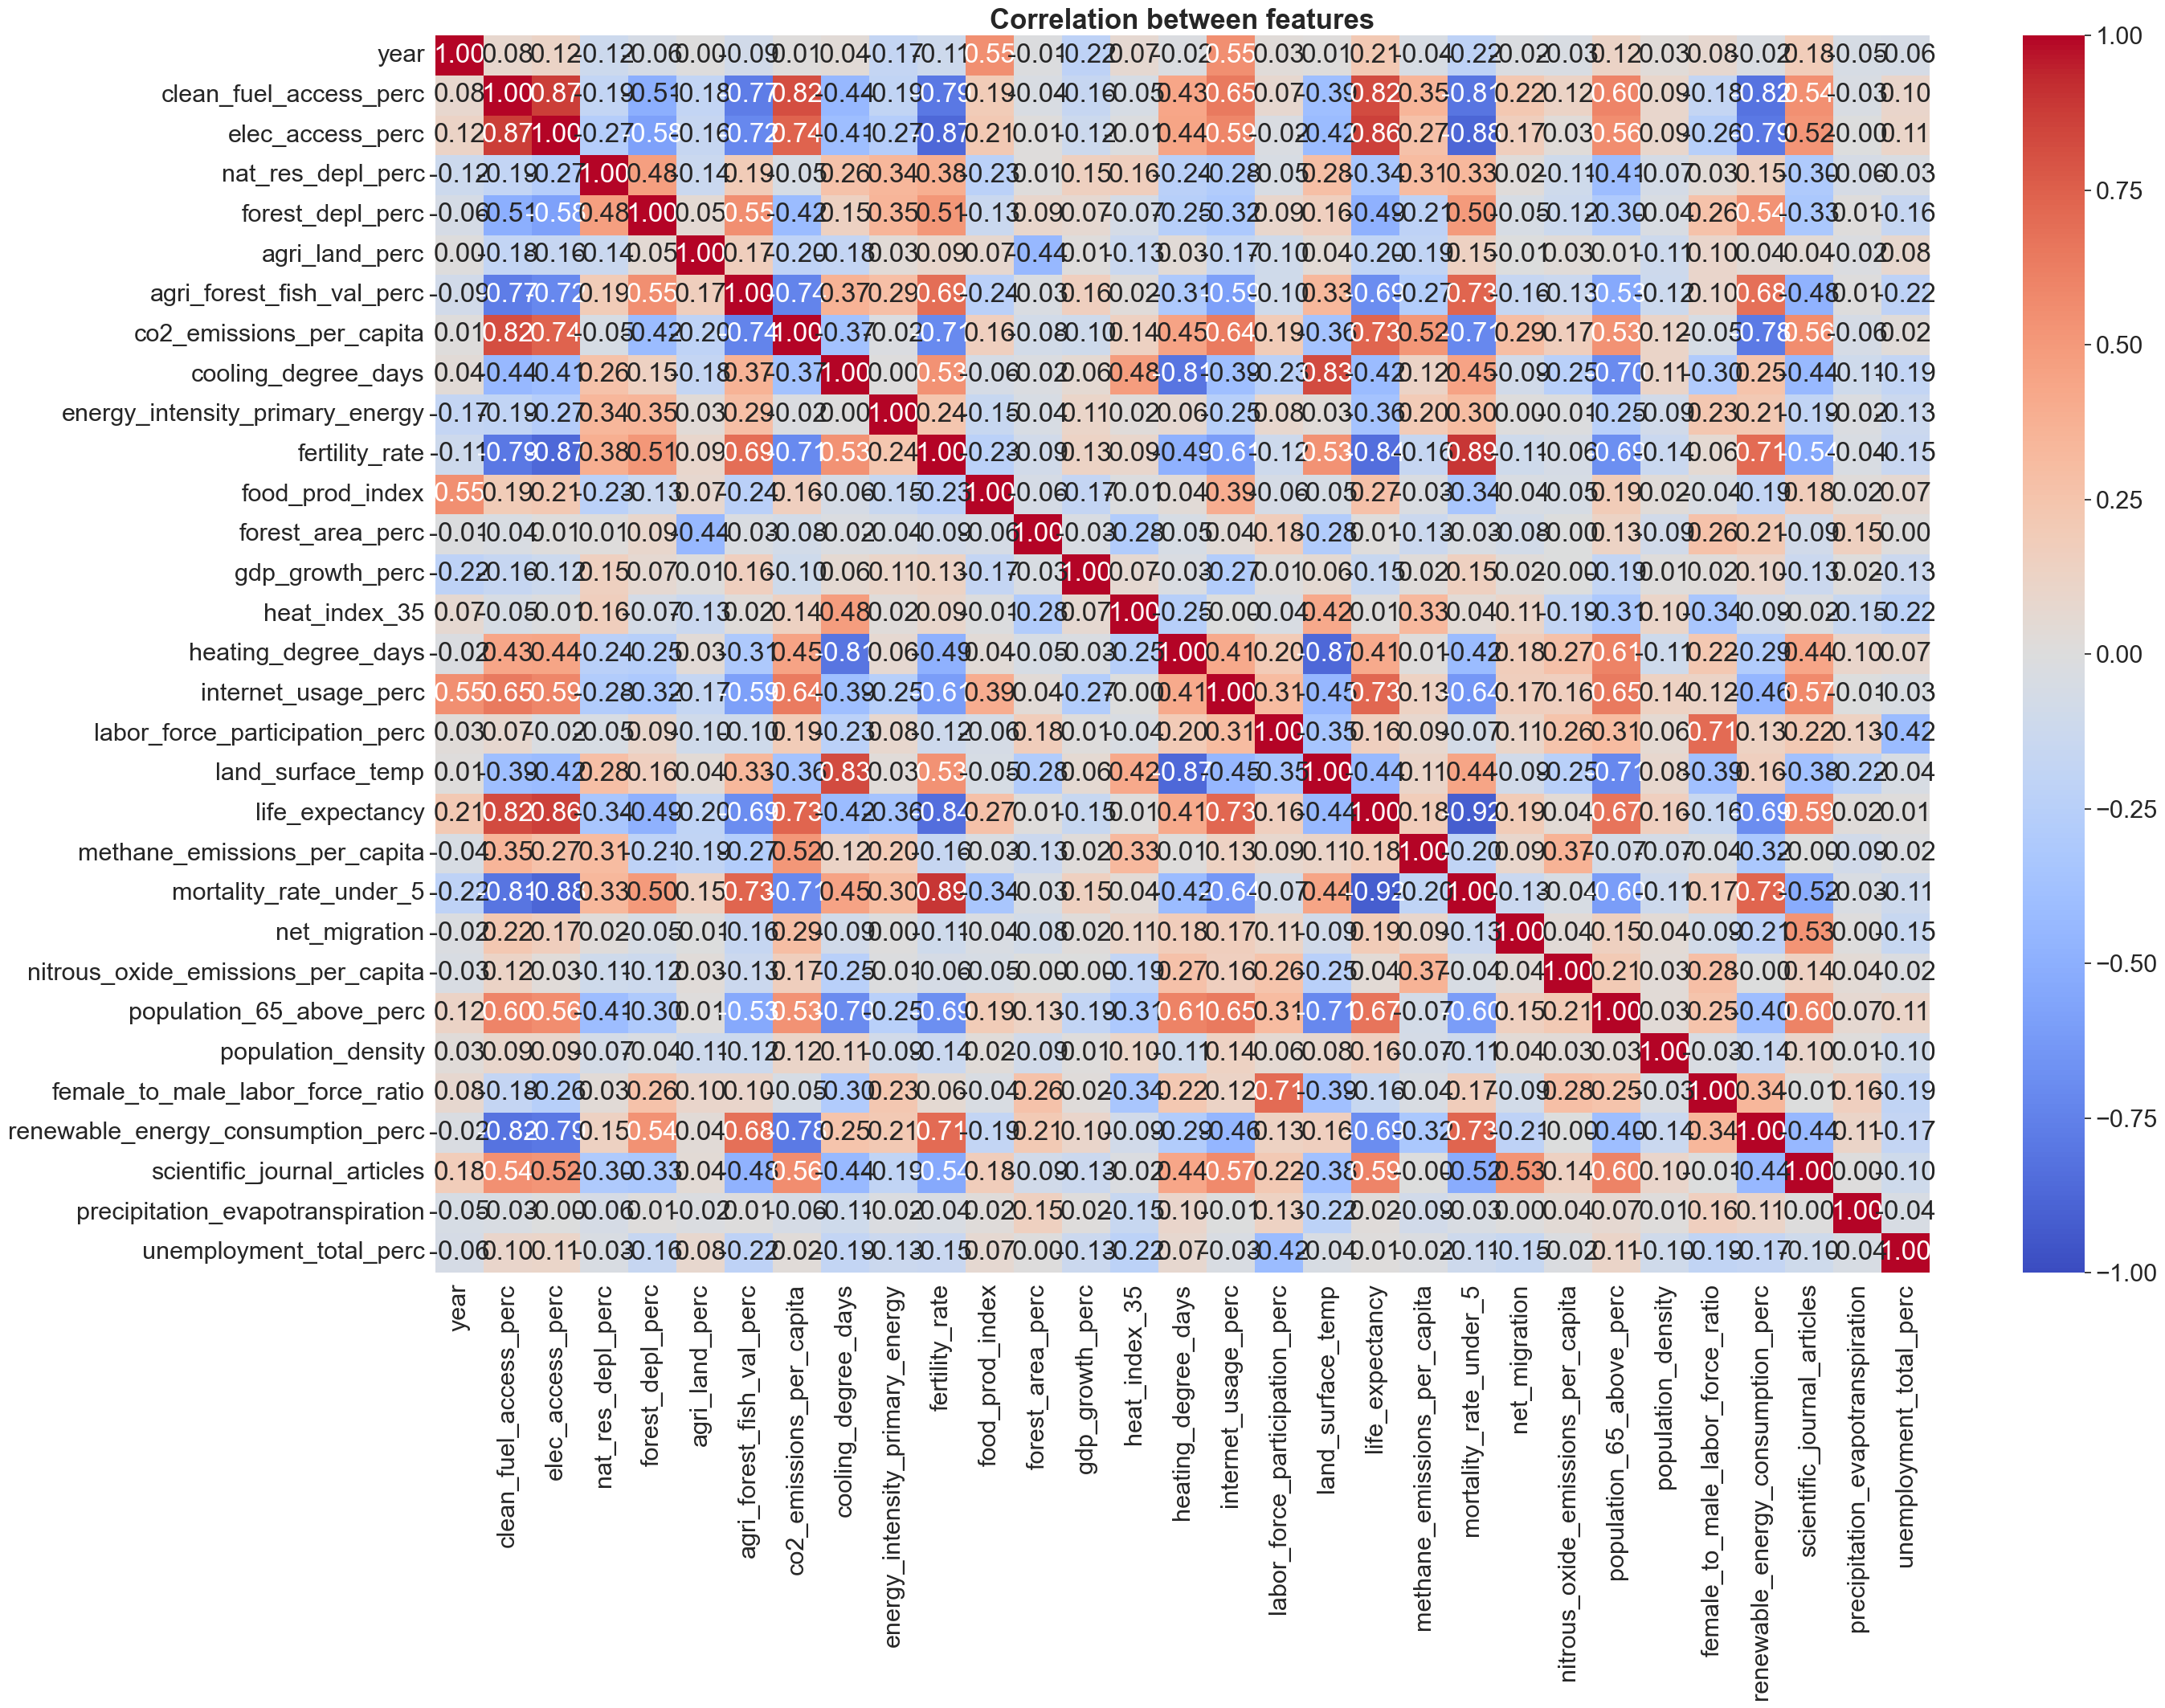

In [28]:
# Plot a correlation of all numeric features
# Correlation matrix
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', fmt=".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold')
plt.show()

sns.set(font_scale=1)

### Deleting Features with a low correlation (Hot Fix)

This are too many features. In the following I will check for a reasonable Threshold for the correlation between the feature and our target variable and I will delete the features with a low correlation.

This is just a hot fix since the correaltion only measures the linear realtionship. 

Pros of Removing Low-Correlation Features
- Simplifies the Model: Reducing the number of features can simplify the model, making it easier to interpret and faster to train.
- Reduces Overfitting: Removing irrelevant or noisy features can help reduce overfitting, especially in models prone to overfitting like decision trees.
- Improves Performance: In some cases, removing low-correlation features can improve model performance by focusing on the 

Cons of Removing Low-Correlation Features
- Loss of Information: Some features with low correlation to the target variable might still contain valuable information, especially in combination with other features.
- Non-Linear Relationships: Correlation measures linear relationships. Features with non-linear relationships to the target variable might be wrongly discarded.
- Domain Knowledge: Features that appear to have low correlation might still be important based on domain knowledge.

Total Features:  31
Threshold: 0.3, Number of features: 12
Threshold: 0.4, Number of features: 11
Threshold: 0.5, Number of features: 6
Threshold: 0.6, Number of features: 1
Threshold: 0.7, Number of features: 1
Threshold: 0.8, Number of features: 1


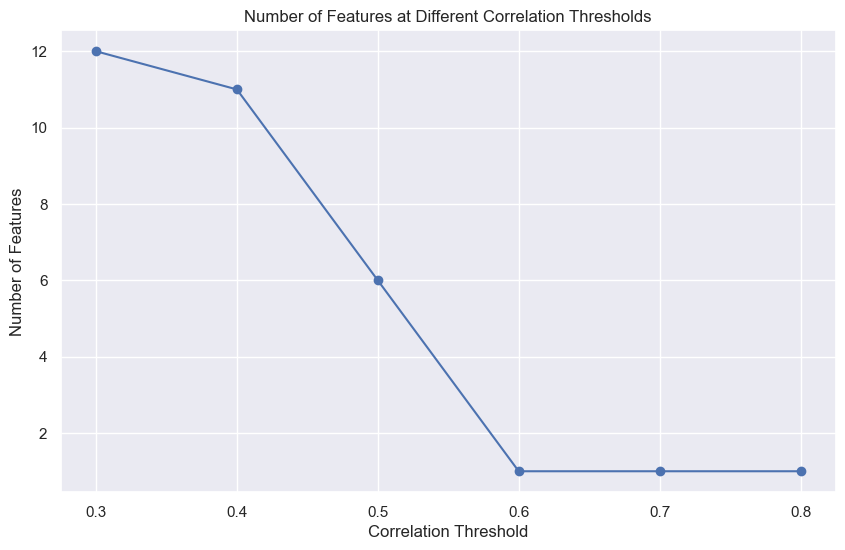

In [ ]:
# Print the total number of numeric features
print("Total Features: ", features.shape[1])

# Compute the absolute correlation of each feature with the target variable
cor_target = features.corrwith(data['co2_emissions_per_capita']).abs()

# Function to get the number of features at different thresholds
def get_feature_counts(cor_target, thresholds):
    feature_counts = {}
    for threshold in thresholds:
        high_corr_features = cor_target[cor_target > threshold].index
        feature_counts[threshold] = len(high_corr_features)
    return feature_counts

# Define thresholds to test
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Get the number of features at each threshold
feature_counts = get_feature_counts(cor_target, thresholds)

# Print the results
for threshold, count in feature_counts.items():
    print(f"Threshold: {threshold}, Number of features: {count}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(list(feature_counts.keys()), list(feature_counts.values()), marker='o')
plt.xlabel('Correlation Threshold')
plt.ylabel('Number of Features')
plt.title('Number of Features at Different Correlation Thresholds')
plt.grid(True)

plt.show()

Based on the Data a Threshold of 0.3 is choosen to create a simpler matrix with less noise since a Matrix with 12 features gives a good overview. 

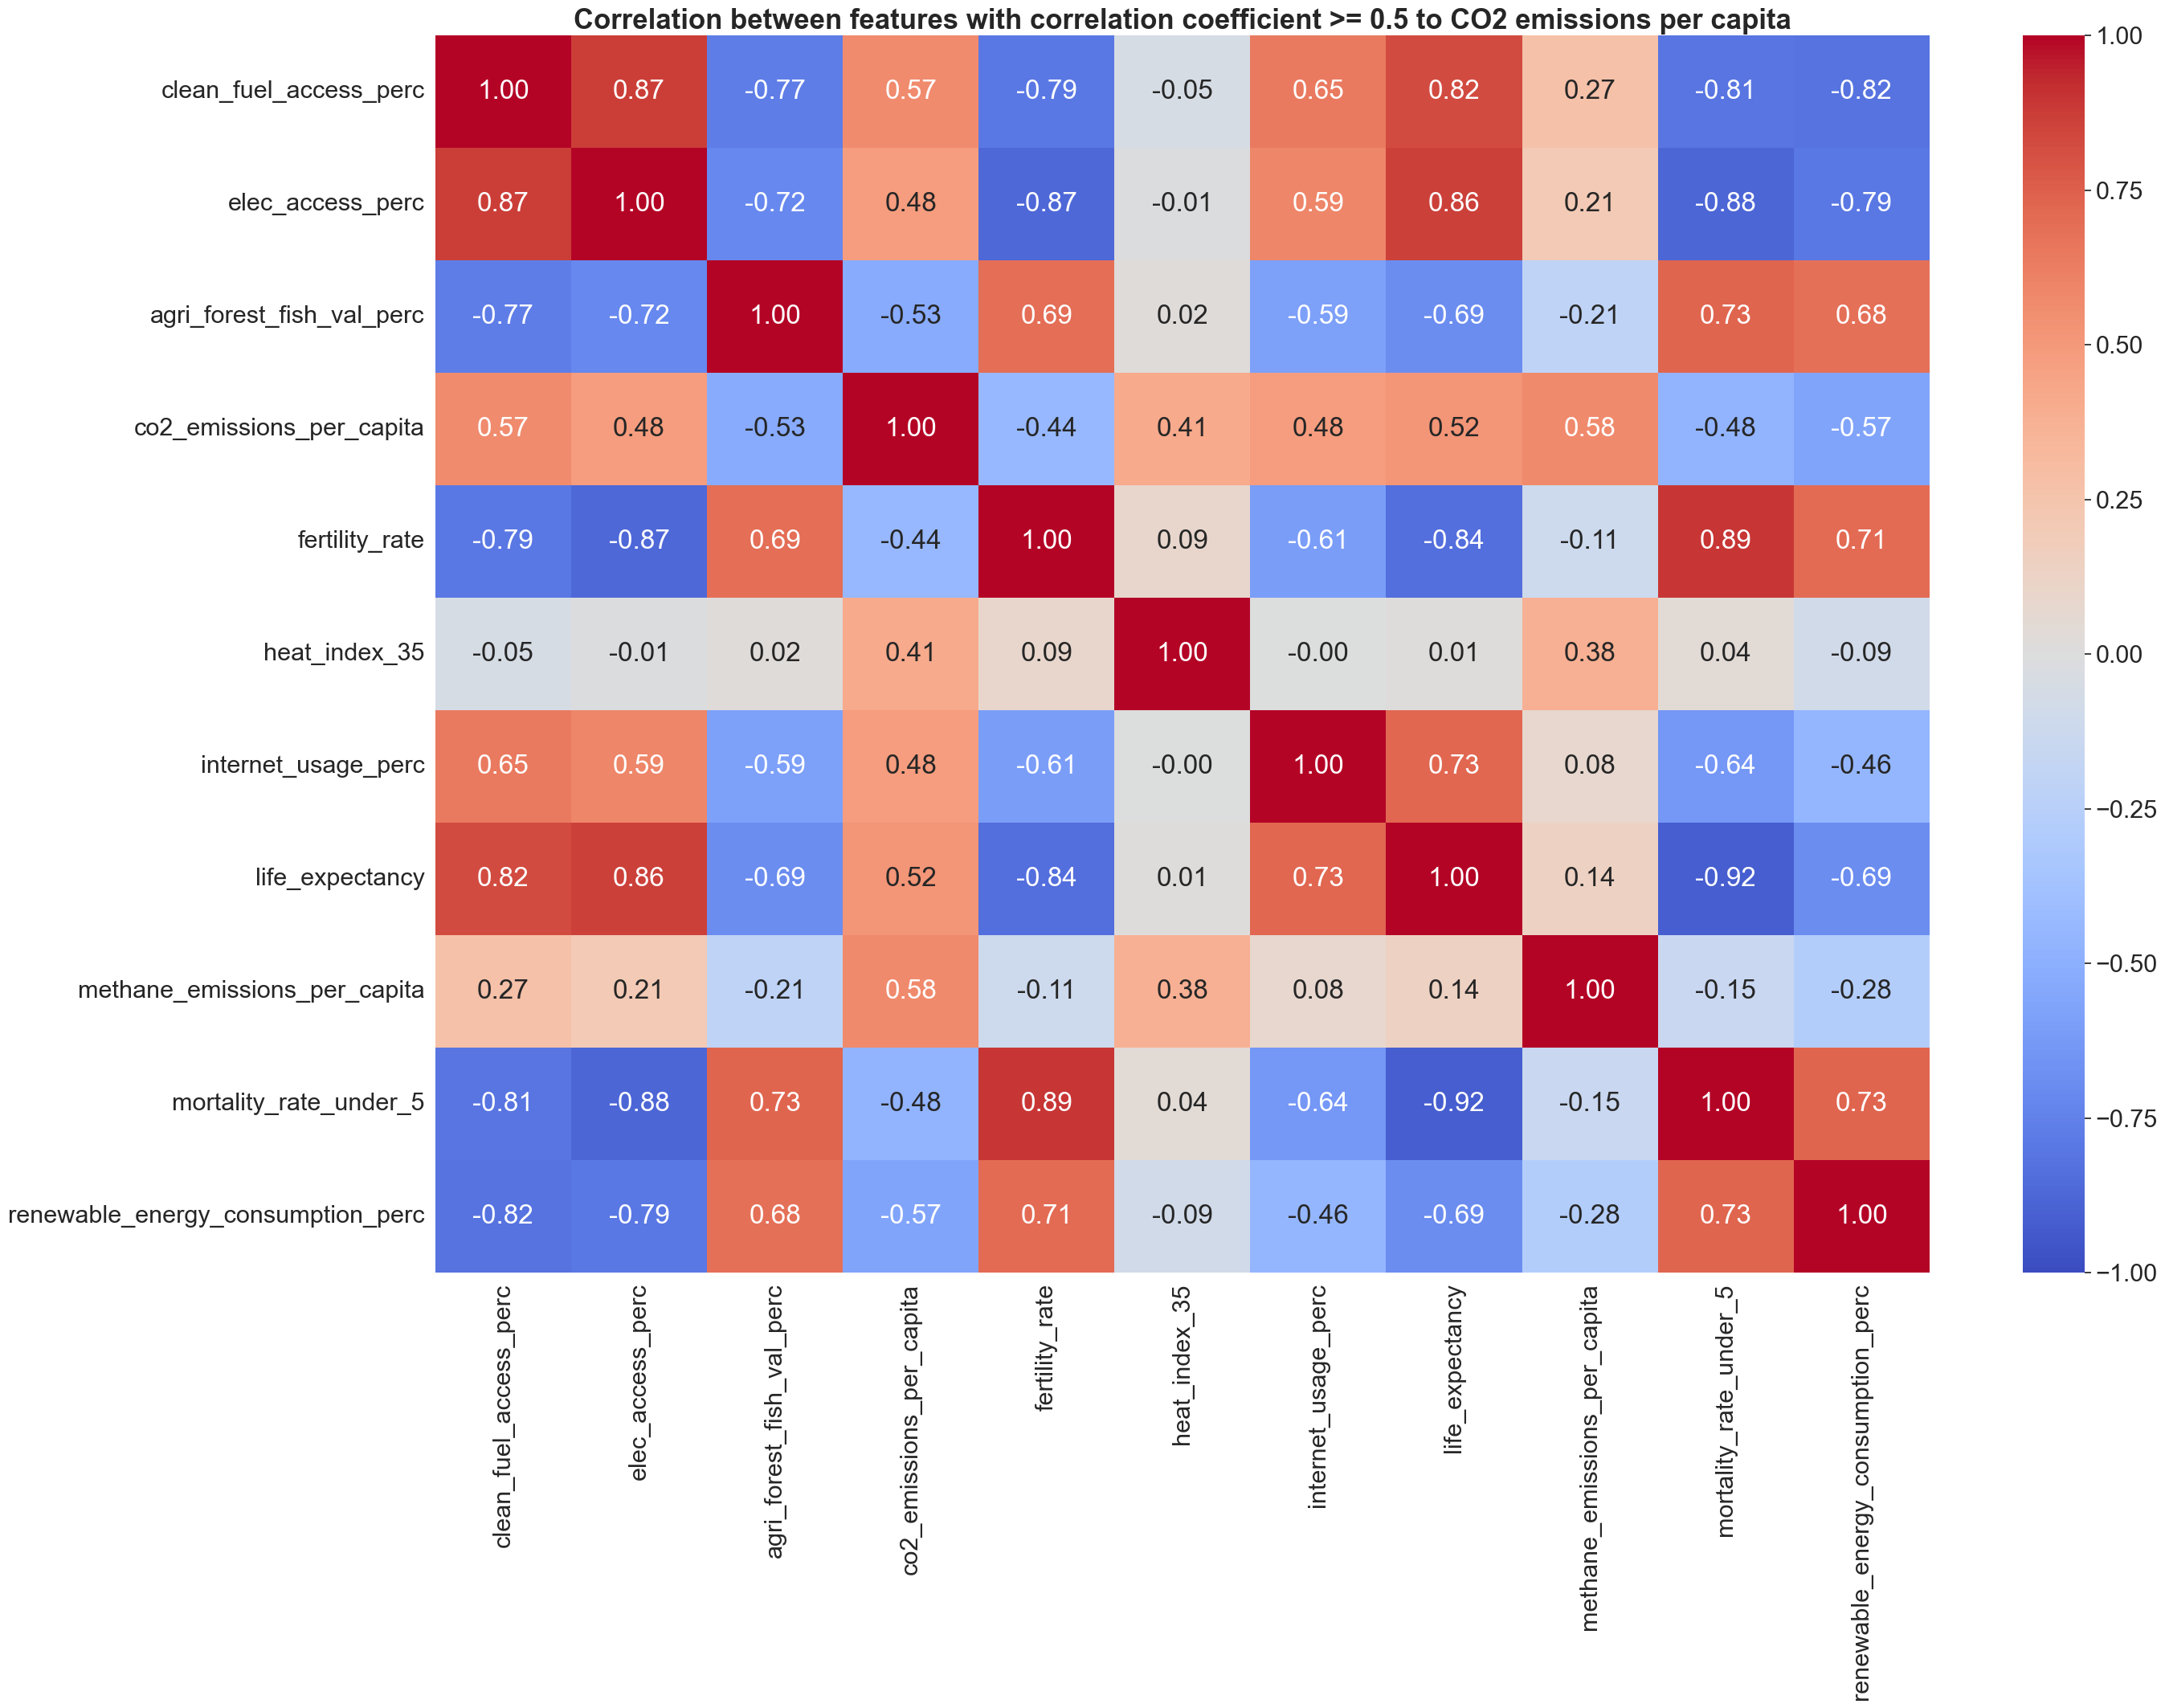

Total selected features:  11


In [ ]:
# Features with a correlation under COR_TARGET to target variable (CO2) will be eliminated
COR_TARGET = 0.3

# Select only numeric features
numeric_features = data.select_dtypes(include=[np.number])

# Compute the absolute correlation of each feature with the target variable
cor_target = numeric_features.corrwith(data['co2_emissions_per_capita']).abs()

# Select features with a correlation coefficient higher than COR_TARGET
high_corr_features = cor_target[cor_target > COR_TARGET].index

# Filter the numeric features to include only those with high correlation
selected_high_corr_features = numeric_features[high_corr_features]

# Add back the columns 'country' and 'year'
# data_high_corr = data[['country', 'year']].join(selected_high_corr_features)
# Add back the columns 'country' 
data_high_corr = data[['country']].join(selected_high_corr_features)

# Plot a correlation of the filtered numeric features
sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(selected_high_corr_features.corr(), annot=True, cmap='coolwarm', fmt=".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation between features with correlation coefficient >= 0.5 to CO2 emissions per capita', fontsize=25, weight='bold')
plt.show()

sns.set(font_scale=1)

# Print the total number of selected features
print("Total selected features: ", selected_high_corr_features.shape[1])

In [31]:
data_high_corr.head()

country  clean_fuel_access_perc  elec_access_perc  \
0  Albania                    38.7         99.430855   
1  Albania                    41.0         99.421989   
2  Albania                    43.8         99.404579   
3  Albania                    46.5         99.385628   
4  Albania                    49.2         99.372139   

   agri_forest_fish_val_perc  co2_emissions_per_capita  fertility_rate  \
0                  24.515412                  1.031568           2.231   
1                  22.716164                  1.056868           2.150   
2                  22.025114                  1.233002           2.036   
3                  21.978257                  1.361159           1.978   
4                  20.537486                  1.427944           1.890   

   heat_index_35  internet_usage_perc  life_expectancy  \
0            0.0             0.114097           75.404   
1            0.0             0.325798           75.639   
2            0.0             0.390081           75.890   
3            0.0             0.971900           76.142   
4            0.0             2.420388           76.376   

   methane_emissions_per_capita  mortality_rate_under_5  \
0                      1.186495                    27.2   
1                      1.178694                    25.8   
2                      1.167191                    24.4   
3                      1.175209                    22.9   
4                      1.156040                    21.5   

   renewable_energy_consumption_perc  
0                              41.36  
1                              39.04  
2                              35.82  
3                              33.67  
4                              35.84

In [32]:
data[data_high_corr.columns]

country  clean_fuel_access_perc  elec_access_perc  \
0      Albania                    38.7         99.430855   
1      Albania                    41.0         99.421989   
2      Albania                    43.8         99.404579   
3      Albania                    46.5         99.385628   
4      Albania                    49.2         99.372139   
...        ...                     ...               ...   
3355  Zimbabwe                    30.0         42.465588   
3356  Zimbabwe                    29.8         43.979065   
3357  Zimbabwe                    30.0         45.400288   
3358  Zimbabwe                    30.2         46.682095   
3359  Zimbabwe                    30.3         52.747667   

      agri_forest_fish_val_perc  co2_emissions_per_capita  fertility_rate  \
0                     24.515412                  1.031568           2.231   
1                     22.716164                  1.056868           2.150   
2                     22.025114                  1.233002           2.036   
3                     21.978257                  1.361159           1.978   
4                     20.537486                  1.427944           1.890   
...                         ...                       ...             ...   
3355                   7.873986                  0.723062           3.771   
3356                   8.340969                  0.663069           3.706   
3357                   7.319375                  0.735435           3.659   
3358                   9.819262                  0.663338           3.599   
3359                   8.772859                  0.530484           3.545   

      heat_index_35  internet_usage_perc  life_expectancy  \
0              0.00             0.114097           75.404   
1              0.00             0.325798           75.639   
2              0.00             0.390081           75.890   
3              0.00             0.971900           76.142   
4              0.00             2.420388           76.376   
...             ...                  ...              ...   
3355           0.15            23.119989           60.306   
3356           0.00            24.400000           60.709   
3357           0.01            25.000000           61.414   
3358           0.21            26.588274           61.292   
3359           0.11            29.298565           61.124   

      methane_emissions_per_capita  mortality_rate_under_5  \
0                         1.186495                    27.2   
1                         1.178694                    25.8   
2                         1.167191                    24.4   
3                         1.175209                    22.9   
4                         1.156040                    21.5   
...                            ...                     ...   
3355                      0.820551                    57.9   
3356                      0.816483                    56.2   
3357                      0.817171                    53.7   
3358                      0.811302                    52.7   
3359                      0.769692                    51.8   

      renewable_energy_consumption_perc  
0                                 41.36  
1                                 39.04  
2                                 35.82  
3                                 33.67  
4                                 35.84  
...                                 ...  
3355                              82.07  
3356                              82.63  
3357                              80.43  
3358                              81.52  
3359                              84.36  

[3360 rows x 12 columns]

***

## Visualizations


In [33]:
data_visual = data_high_corr

#### Choose a subset of countries to plot
The big amount of data points will result in a less clear representation. This can be avoided by choosing roughly third of the countries just for the paired scatter plot:

In [17]:
# Get unique countries
unique_countries = data_visual["country"].unique()

# Randomly select around third of the unique countries
num_countries_to_select = len(unique_countries) // 3
selected_countries = np.random.choice(unique_countries, num_countries_to_select, replace=False)

# Filter the DataFrame to include only the selected countries
filtered_data = data_visual[data_visual["country"].isin(selected_countries)]

# Print the selected countries and the filtered DataFrame
print("Selected Countries:", selected_countries)
filtered_data.head()

Selected Countries: ['Bulgaria' 'El Salvador' 'Kenya' 'Malawi' 'Kyrgyz Republic' 'Malta'
 'Canada' 'Cyprus' 'Montenegro' 'Tanzania' 'Poland'
 'Bosnia and Herzegovina' 'Paraguay' 'Bolivia' 'Turkiye' 'Botswana' 'Chad'
 'Pakistan' 'Congo, Rep.' 'Japan' 'Azerbaijan' 'Morocco' 'Kuwait'
 'New Zealand' 'Senegal' 'Libya' 'St. Vincent and the Grenadines' 'Mali'
 'Panama' 'Iraq' 'Namibia' 'Congo, Dem. Rep.' 'Moldova' 'Sudan' 'Malaysia'
 'Hungary' 'Bangladesh' 'Jamaica' 'Greece' 'Trinidad and Tobago'
 'Argentina' 'Nicaragua' 'Kazakhstan' 'France' 'Burkina Faso' 'Croatia'
 'Thailand' 'Mongolia' 'India' 'Saudi Arabia' 'Sweden' 'Portugal'
 'Honduras']


country  clean_fuel_access_perc  agri_forest_fish_val_perc  \
63  Argentina                    95.8                   4.679911   
64  Argentina                    96.3                   4.568590   
65  Argentina                    96.8                  10.206647   
66  Argentina                    97.2                  10.328167   
67  Argentina                    97.6                   8.362487   

    co2_emissions_per_capita  life_expectancy  methane_emissions_per_capita  \
63                  3.567918           73.926                      3.231956   
64                  3.341877           74.186                      3.213490   
65                  3.100489           74.408                      3.265668   
66                  3.334891           74.080                      3.429969   
67                  3.656085           74.855                      3.436364   

    renewable_energy_consumption_perc  
63                               9.85  
64                              11.51  
65                              11.62  
66                              10.82  
67                               9.29

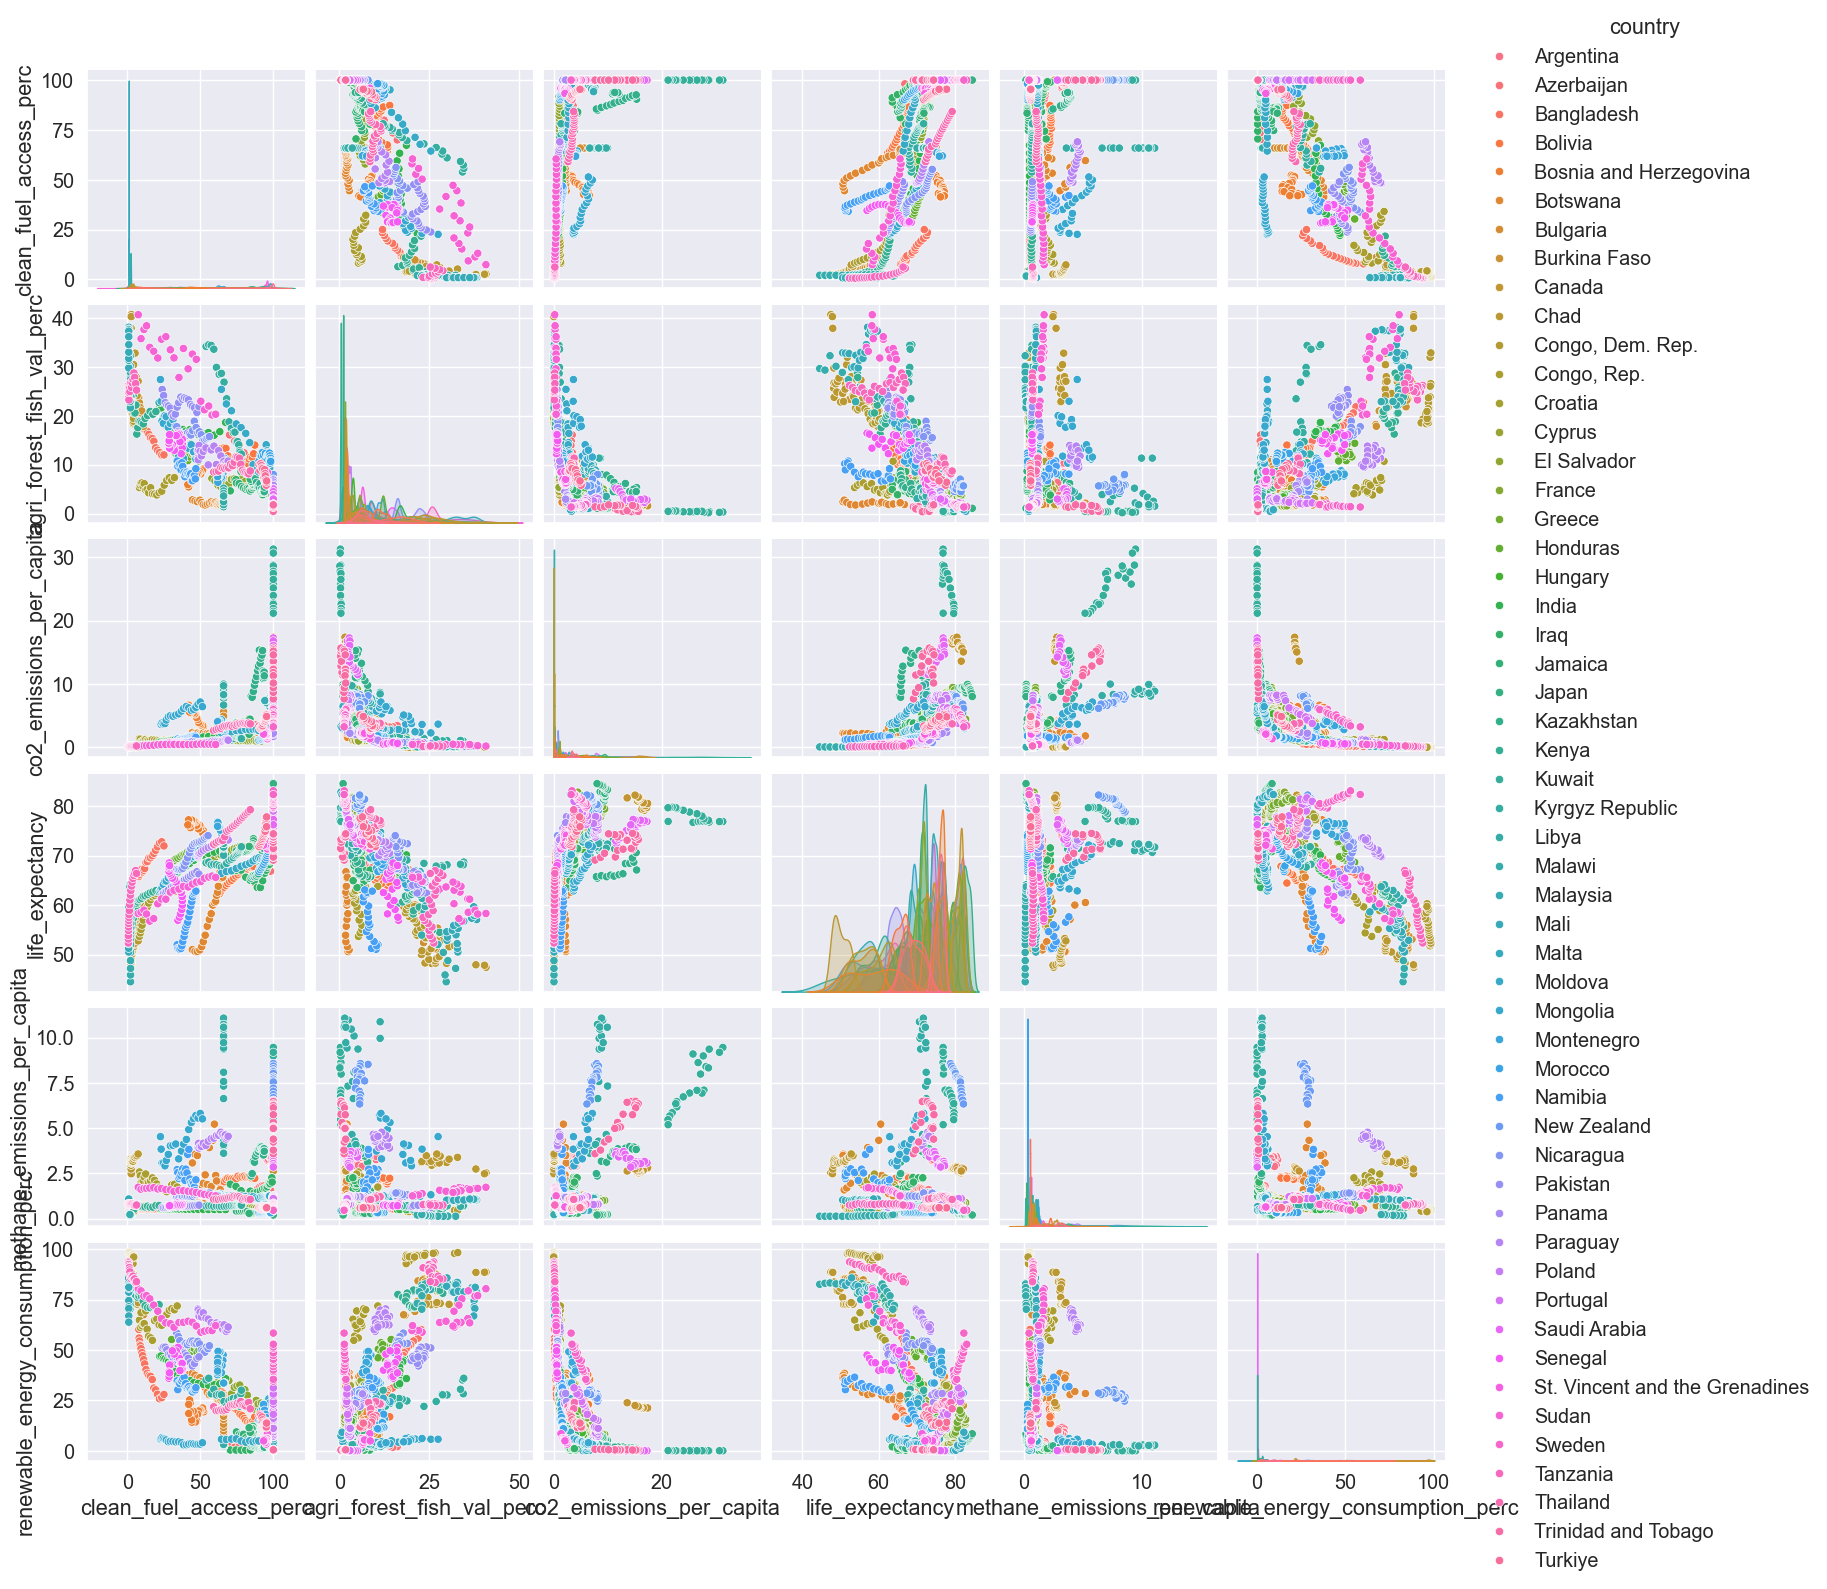

In [34]:
sns.set(font_scale=1.3)
sns.pairplot(data=filtered_data, hue='country')

The most obvious linear dependency of co2_per_cap is with en_per_cap. Apparent hints for nonlinear relationships can be observed in the plots of *co2_per_cap* versus *gni*, *pop_urb_aggl_perc*, *pop_growth_perc*, *urb_pop_growth_perc*.

## PCA Analysis

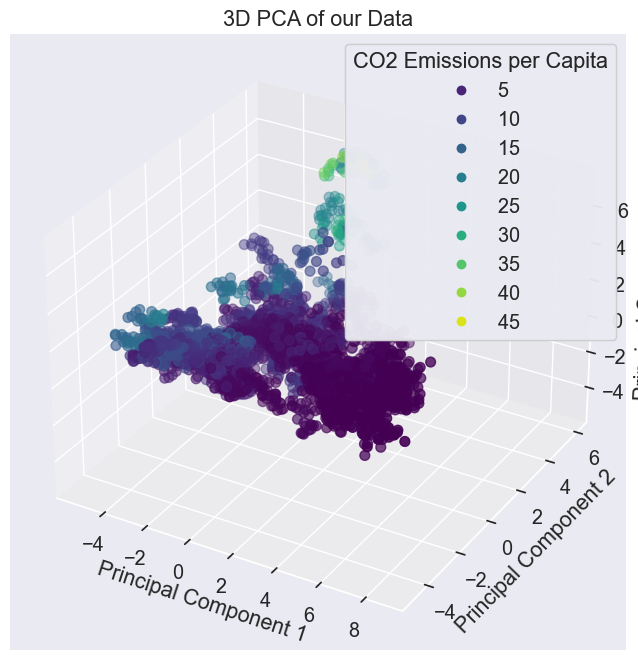

Explained variance by component: [0.28804618 0.11692017 0.07153158]


In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Select only numeric features and exclude the target variable
pca_features = data.select_dtypes(include=[np.number]).drop(columns=['co2_emissions_per_capita'])

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pca_features)

# Apply PCA
pca = PCA(n_components=3)  # Adjust the number of components as needed
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Add back the non-numeric columns (e.g., 'country' and 'year') and the target variable
pca_df = pd.concat([data[['country', 'year', 'co2_emissions_per_capita']].reset_index(drop=True), pca_df], axis=1)

# Plot the principal components in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['co2_emissions_per_capita'], cmap='viridis', s=50)

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of our Data')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="CO2 Emissions per Capita")
ax.add_artist(legend1)

plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by component: {explained_variance}')

In [46]:
pca_df.head()

country  year  co2_emissions_per_capita       PC1       PC2       PC3
0  Albania  2000                  1.031568  0.069028 -0.392074 -1.481405
1  Albania  2001                  1.056868 -0.160769 -0.502685 -1.479002
2  Albania  2002                  1.233002 -0.393178 -0.776851 -1.536911
3  Albania  2003                  1.361159 -0.439709 -0.507872 -1.449016
4  Albania  2004                  1.427944 -0.653768 -0.736615 -1.475953

In [47]:
# Save the resulting DataFrame to a CSV file
pca_df.to_csv('pca_result.csv', index=False)